<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل کلمات پرکاربرد نظرات در سه دسته
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazirmatn" color="#0099cc">
مقدمه و صورت مسئله
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazirmatn" size=3>
در این بخش، هدف ما تحلیل محتوایی نظرات کاربران بر اساس احساسات مثبت، خنثی و منفی است.
ابتدا نظرات بر اساس امتیاز کلی (ستون overall) برچسب‌گذاری می‌شوند و پس از پاک‌سازی داده‌های متنی، برای هر دسته از احساسات یک ابر کلمات (Word Cloud) رسم می‌شود تا پرکاربردترین واژگان مشخص شوند. همچنین کلمات مشترک بین دسته‌ها استخراج و تحلیل می‌شوند تا الگوهای زبانی مشابه میان بازخوردهای مثبت و منفی مشخص گردد.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اتصال فضای کاری Colab به Google Drive برای دسترسی مستقیم به فایل‌های داده.
</font>
</p>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
وارد کردن کتابخانه‌های موردنیاز برای تحلیل داده، پردازش زبان طبیعی و مصورسازی.
</font>
</p>

In [3]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import random
from collections import Counter

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
خواندن فایل داده‌ی اصلی شامل نظرات کاربران.
<br>
در این بخش از تحلیل ما فقط به ستون reviewText که  شامل متن نظرات است، نیاز داریم پس na نبودن این ستون برای ما کافیست.
</font>
</p>

In [4]:
train_data = pd.read_csv('/content/drive/MyDrive/project2/train_data.csv')

/tmp/ipython-input-3114442223.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('/content/drive/MyDrive/project2/train_data.csv')


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838944 entries, 0 to 838943
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         838944 non-null  int64 
 1   vote            191468 non-null  object
 2   verified        838944 non-null  bool  
 3   reviewTime      838944 non-null  object
 4   reviewerID      838944 non-null  object
 5   asin            838944 non-null  object
 6   style           490613 non-null  object
 7   reviewerName    838717 non-null  object
 8   reviewText      838944 non-null  object
 9   summary         838868 non-null  object
 10  unixReviewTime  838944 non-null  int64 
dtypes: bool(1), int64(2), object(8)
memory usage: 64.8+ MB


In [22]:
# train_data.isna().sum()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پیش پردازش و تمیزکاری نظرات
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
دانلود و تعریف کلمات توقف (stop words) برای حذف واژگان غیرمفید مانند "the"، "is" و ...
</font>
</p>

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تابع برچسب‌گذاری احساسات بر اساس امتیاز کلی (overall).
<br>
نظرات با امتیاز 4 و 5 جزء دسته مثبت و با امتیاز 3 دسته خنثی و سایر نظرات (امتیاز 1و 2) جزء دسته منفی به حساب می آیند.
</font>
</p>

In [7]:
def label_sentiment(x):
    if x in [4,5]:
        return 'positive'
    elif x == 3:
        return 'neutral'
    else:
        return 'negative'

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
افزودن ستون جدید با نام sentiment که نشان‌دهنده‌ی نوع احساس (مثبت، خنثی، منفی) است.
</font>
</p>

In [8]:
train_data['sentiment'] = train_data['overall'].apply(label_sentiment)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تابع پاک‌سازی متن شامل:
<br>
<ul dir="rtl">
<li>
تبدیل به حروف کوچک،
</li>
<li>
حذف علائم نگارشی،
</li>
<li>
حذف کلمات توقف و کلمات کوتاه‌تر از ۳ حرف.
</li>
</ul>
</font>
</p>

In [9]:
def clean_text(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stop_words and len(w)>2]
    return ' '.join(words)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اعمال تابع پاک‌سازی روی ستون متنی نظرات کاربران.
</font>
</p>

In [10]:
train_data['clean_text'] = train_data['reviewText'].apply(clean_text)

In [11]:
# def sample_texts(df, sentiment, n=3000):
#     texts = df.loc[df['sentiment']==sentiment, 'clean_text'].dropna().tolist()
#     random.shuffle(texts)
#     return ' '.join(texts[:n])

In [12]:
# pos_text = sample_texts(train_data, 'positive')
# neu_text = sample_texts(train_data, 'neutral')
# neg_text = sample_texts(train_data, 'negative')

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ادغام تمامی متون هر دسته در یک رشته واحد برای تولید ابر کلمات و تحلیل فراوانی.
</font>
</p>

In [13]:
pos_text = ' '.join(train_data[train_data['sentiment'] == 'positive']['clean_text'].tolist())
neu_text = ' '.join(train_data[train_data['sentiment'] == 'neutral']['clean_text'].tolist())
neg_text = ' '.join(train_data[train_data['sentiment'] == 'negative']['clean_text'].tolist())

In [14]:
len(pos_text)

238848772

In [15]:
pos_text[:20]

'first time ive ever '

In [16]:
neg_text[:20]

'older urcwr7 remote '

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بررسی و تحلیل کلمات پرکاربرد
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
محاسبه‌ی ۲۰ کلمه پرتکرار در هر دسته و نمایش آن‌ها به‌صورت جدول با سه بخش Positive / Neutral / Negative Class.
</font>
</p>

In [17]:
top_n = 20
top_pos = Counter(pos_text.split()).most_common(top_n)
top_neu = Counter(neu_text.split()).most_common(top_n)
top_neg = Counter(neg_text.split()).most_common(top_n)

df_pos = pd.DataFrame(top_pos, columns=['Word', 'Count'])
df_neu = pd.DataFrame(top_neu, columns=['Word', 'Count'])
df_neg = pd.DataFrame(top_neg, columns=['Word', 'Count'])

df_pos.columns = pd.MultiIndex.from_product([['Positive Class'], ['Word', 'Count']])
df_neu.columns = pd.MultiIndex.from_product([['Neutral Class'], ['Word', 'Count']])
df_neg.columns = pd.MultiIndex.from_product([['Negative Class'], ['Word', 'Count']])

In [18]:
pd.concat([df_pos, df_neu, df_neg], axis=1)

Positive Class         Neutral Class        Negative Class       
             Word   Count          Word  Count           Word  Count
0             one  299842           one  40615            one  72053
1           great  285107         would  35550          would  58012
2             use  261978           use  35351           work  50787
3            like  223003          good  32314            get  50494
4            good  218571          like  32197            use  46194
5            well  204804           get  30307           like  40323
6           would  192536          work  25866           time  38618
7             get  171117          well  22872           even  36637
8           works  156925         sound  21405        product  36558
9           sound  145866         great  21230           back  34272
10           case  145339          dont  20965           good  34082
11        quality  143373          time  19930           dont  32313
12           also  143344       quality  19374         camera  27897
13         really  136399         works  18911         bought  27508
14          cable  128007          case  18872        quality  25907
15          price  127009          also  18827          sound  25500
16           dont  125544        really  18757           well  25448
17           time  124709        camera  18032           also  24778
18           work  124113        better  17773          first  23811
19          using  121705          much  17042          great  23481

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
یافتن کلمات مشترک میان دسته‌های مختلف احساس و بررسی اشتراکات بین آن‌ها برای تحلیل زبانی.
</font>
</p>

In [19]:
pos_set = set([w for w, c in top_pos])
neu_set = set([w for w, c in top_neu])
neg_set = set([w for w, c in top_neg])

common_pos_neu = pos_set & neu_set
common_pos_neg = pos_set & neg_set
common_neu_neg = neu_set & neg_set
common_all = pos_set & neu_set & neg_set

print('Common words between Positive & Neutral:', common_pos_neu)
print('Common words between Positive & Negative:', common_pos_neg)
print('Common words between Neutral & Negative:', common_neu_neg)
print('Common words across all three categories:', common_all)

Common words between Positive & Neutral: {'also', 'works', 'would', 'time', 'work', 'use', 'case', 'really', 'dont', 'sound', 'well', 'good', 'like', 'get', 'great', 'quality', 'one'}
Common words between Positive & Negative: {'also', 'would', 'time', 'work', 'use', 'dont', 'sound', 'well', 'good', 'like', 'get', 'great', 'quality', 'one'}
Common words between Neutral & Negative: {'also', 'would', 'time', 'work', 'use', 'dont', 'sound', 'well', 'camera', 'good', 'like', 'get', 'great', 'quality', 'one'}
Common words across all three categories: {'also', 'would', 'time', 'use', 'work', 'dont', 'sound', 'well', 'one', 'like', 'get', 'great', 'quality', 'good'}


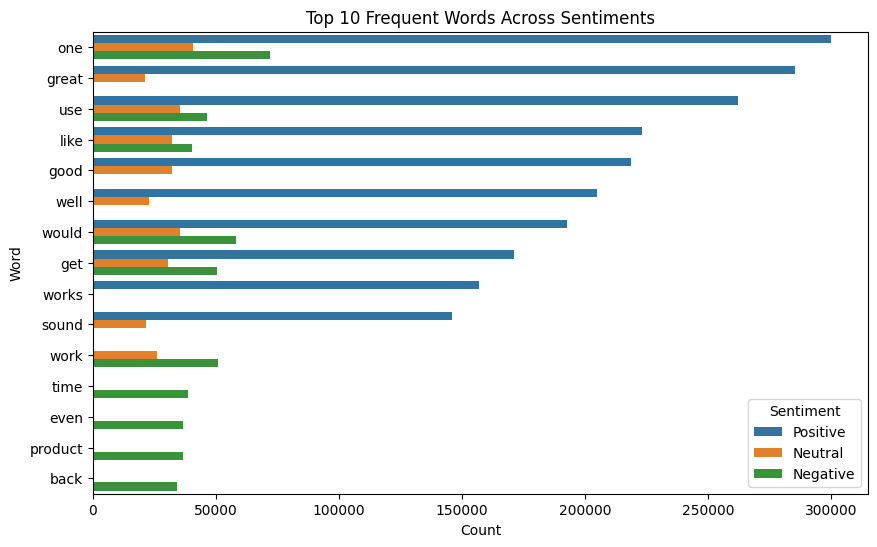

In [20]:
import seaborn as sns

df_compare = pd.concat([
    df_pos['Positive Class'].head(10).assign(Sentiment='Positive'),
    df_neu['Neutral Class'].head(10).assign(Sentiment='Neutral'),
    df_neg['Negative Class'].head(10).assign(Sentiment='Negative')
])

plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Word', hue='Sentiment', data=df_compare)
plt.title('Top 10 Frequent Words Across Sentiments')
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
بررسی ۲۰ واژه‌ی پرتکرار در هر دسته از احساسات نشان می‌دهد که در هر سه گروه، کلمات مشابهی مانند one, use, work, good, time, sound, و quality به‌وفور تکرار شده‌اند.
<br>
این مسئله بیانگر آن است که کاربران، صرف‌نظر از نوع احساس (مثبت، منفی یا خنثی)، اغلب درباره‌ی جنبه‌های مشابهی از محصول صحبت کرده‌اند — مانند عملکرد، کیفیت ساخت یا تجربه‌ی کاربری.
<br>
با این حال، تکرار زیاد کلمات مشترک الزاماً به معنی شباهت در معنا نیست.
<br>
برای مثال، واژه‌ی work در نظرات مثبت ممکن است در عباراتی مانند “works perfectly” یا “works great” ظاهر شود، در حالی‌که در نظرات منفی به شکل “doesn’t work” یا “stopped working” به کار رفته است.
<br>
بنابراین تکرار کلمات بدون توجه به بافت جمله نمی‌تواند احساس واقعی را به‌خوبی نشان دهد.
<br>
به همین دلیل، در مرحله‌ی بعد با استفاده از ابر کلمات (Word Cloud) توزیع و برجستگی واژگان در بستر معنایی گسترده‌تر بررسی می‌شود تا تحلیل دقیق‌تری از محتوای احساسی به‌دست آید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تولید و نمایش ابر کلمات برای هر دسته از احساسات با رنگ‌بندی مجزا جهت مقایسه‌ی بصری.
</font>
</p>

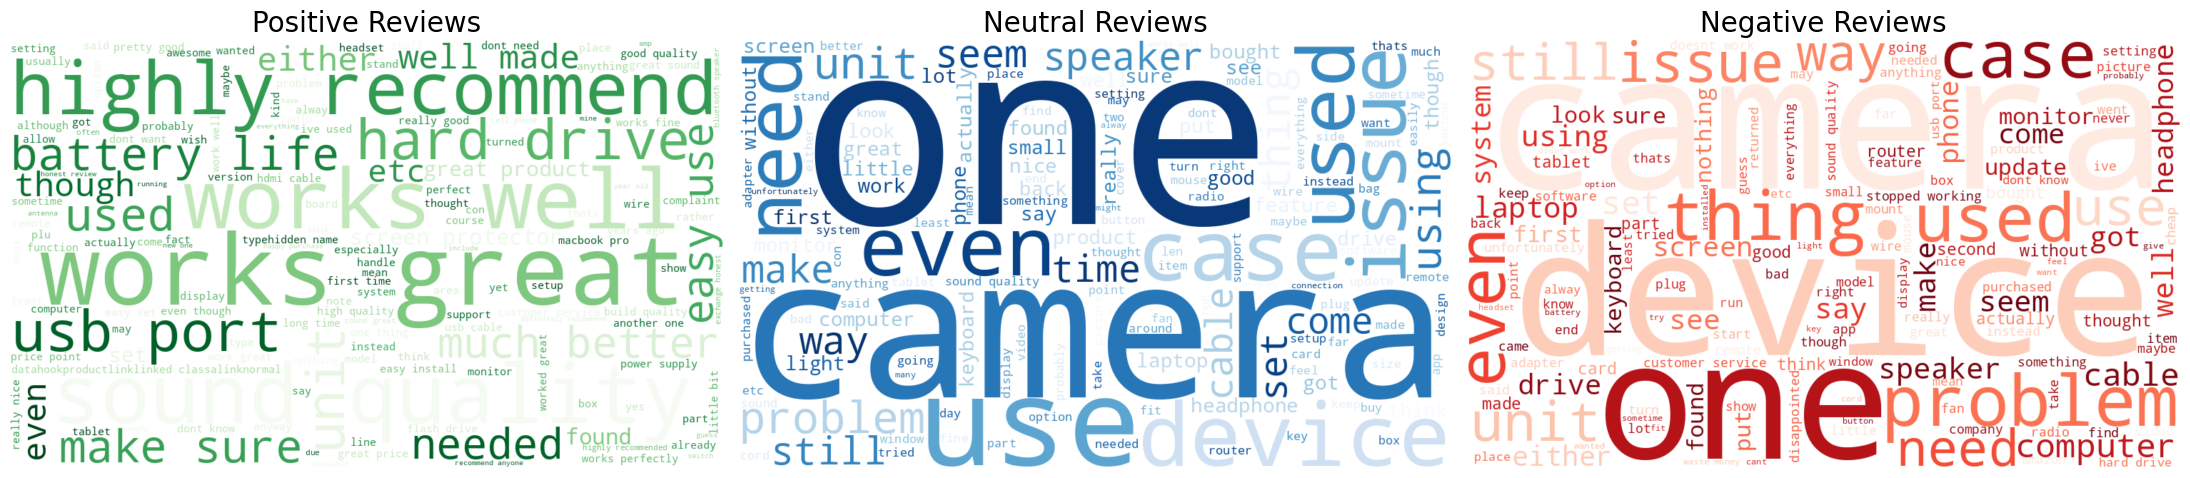

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(22, 10))

for ax, text, title, color in zip(
    axs,
    [pos_text, neu_text, neg_text],
    ['Positive Reviews', 'Neutral Reviews', 'Negative Reviews'],
    ['Greens', 'Blues', 'Reds']
):
    wc = WordCloud(width=1000, height=600, background_color='white',
                   colormap=color, max_words=150).generate(text)
    ax.imshow(wc, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title, fontsize=20)

plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در ابر کلمات مربوط به نظرات مثبت، واژگانی مانند works, great, recommend, easy, life, battery و highly برجسته‌تر دیده می‌شوند. این واژه‌ها نمایانگر رضایت کاربران از عملکرد محصول، سهولت استفاده، و کیفیت کلی کالا هستند.
<br>
در مقابل، در ابر کلمات منفی، واژه‌هایی چون issue, problem, case, broken, device و need با اندازه‌ی بزرگ‌تر ظاهر شده‌اند که بیشتر به بیان مشکلات، خرابی یا نارضایتی از عملکرد محصول اشاره دارند.
<br>
در نظرات خنثی، کلمات عمومی‌تر مانند one, use, camera, work, unit مشاهده می‌شوند که معمولاً فاقد بار احساسی مشخص بوده و بیشتر به توصیف فنی یا عینی محصول پرداخته‌اند.
<br>
همچنین، حضور برخی کلمات مشترک مثل use, work و good در همه‌ی دسته‌ها، نشان‌دهنده‌ی آن است که کاربران به‌طور مکرر درباره‌ی عملکرد یا تجربه‌ی استفاده صحبت کرده‌اند، اما لحن جمله (مثلاً “works perfectly” در برابر “doesn’t work”) تفاوت اصلی در احساس را ایجاد می‌کند.
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
جمع بندی و نتیجه
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
تحلیل فراوانی واژه‌ها و ابرکلمات نشان داد که سه دسته‌ی احساسی (مثبت، خنثی و منفی) از نظر بسامد واژگان اشتراک قابل‌توجهی دارند. کلماتی مانند use, work, good, one و sound در هر سه دسته با فراوانی بالا ظاهر شده‌اند.
<br>
این امر نشان می‌دهد که کاربران، مستقل از نوع احساس خود، معمولاً درباره‌ی جنبه‌های مشابهی از محصولات مانند عملکرد، کیفیت صدا یا تجربه‌ی استفاده صحبت کرده‌اند.
<br>
با این حال، واژگان شاخص هر گروه معنای متفاوتی را منتقل می‌کنند:
<br>
در نظرات مثبت، کلمات برجسته‌ای چون works, great, recommend و easy بیانگر رضایت بالا از عملکرد و کیفیت هستند.
<br>
در نظرات منفی، واژه‌هایی مانند issue, problem, broken و need نمایانگر نارضایتی از خرابی یا کارکرد نامطلوب کالا هستند.
<br>
دسته‌ی خنثی عمدتاً شامل واژگان عمومی و توصیفی مانند camera, unit, use و work است که بار احساسی خاصی ندارند.
<br>
در مجموع، نتایج حاکی از آن است که هرچند کلمات پایه در همه‌ی احساسات مشابه‌اند، اما بار معنایی و بافت جمله تعیین‌کننده‌ی جهت‌گیری احساسی متن است.
<br>
بنابراین تمایز میان احساسات بیشتر در نحوه‌ی ترکیب و کاربرد واژه‌ها در جمله‌ها نمایان می‌شود تا صرفاً در فراوانی ظاهر آن‌ها.
</font>
</p>